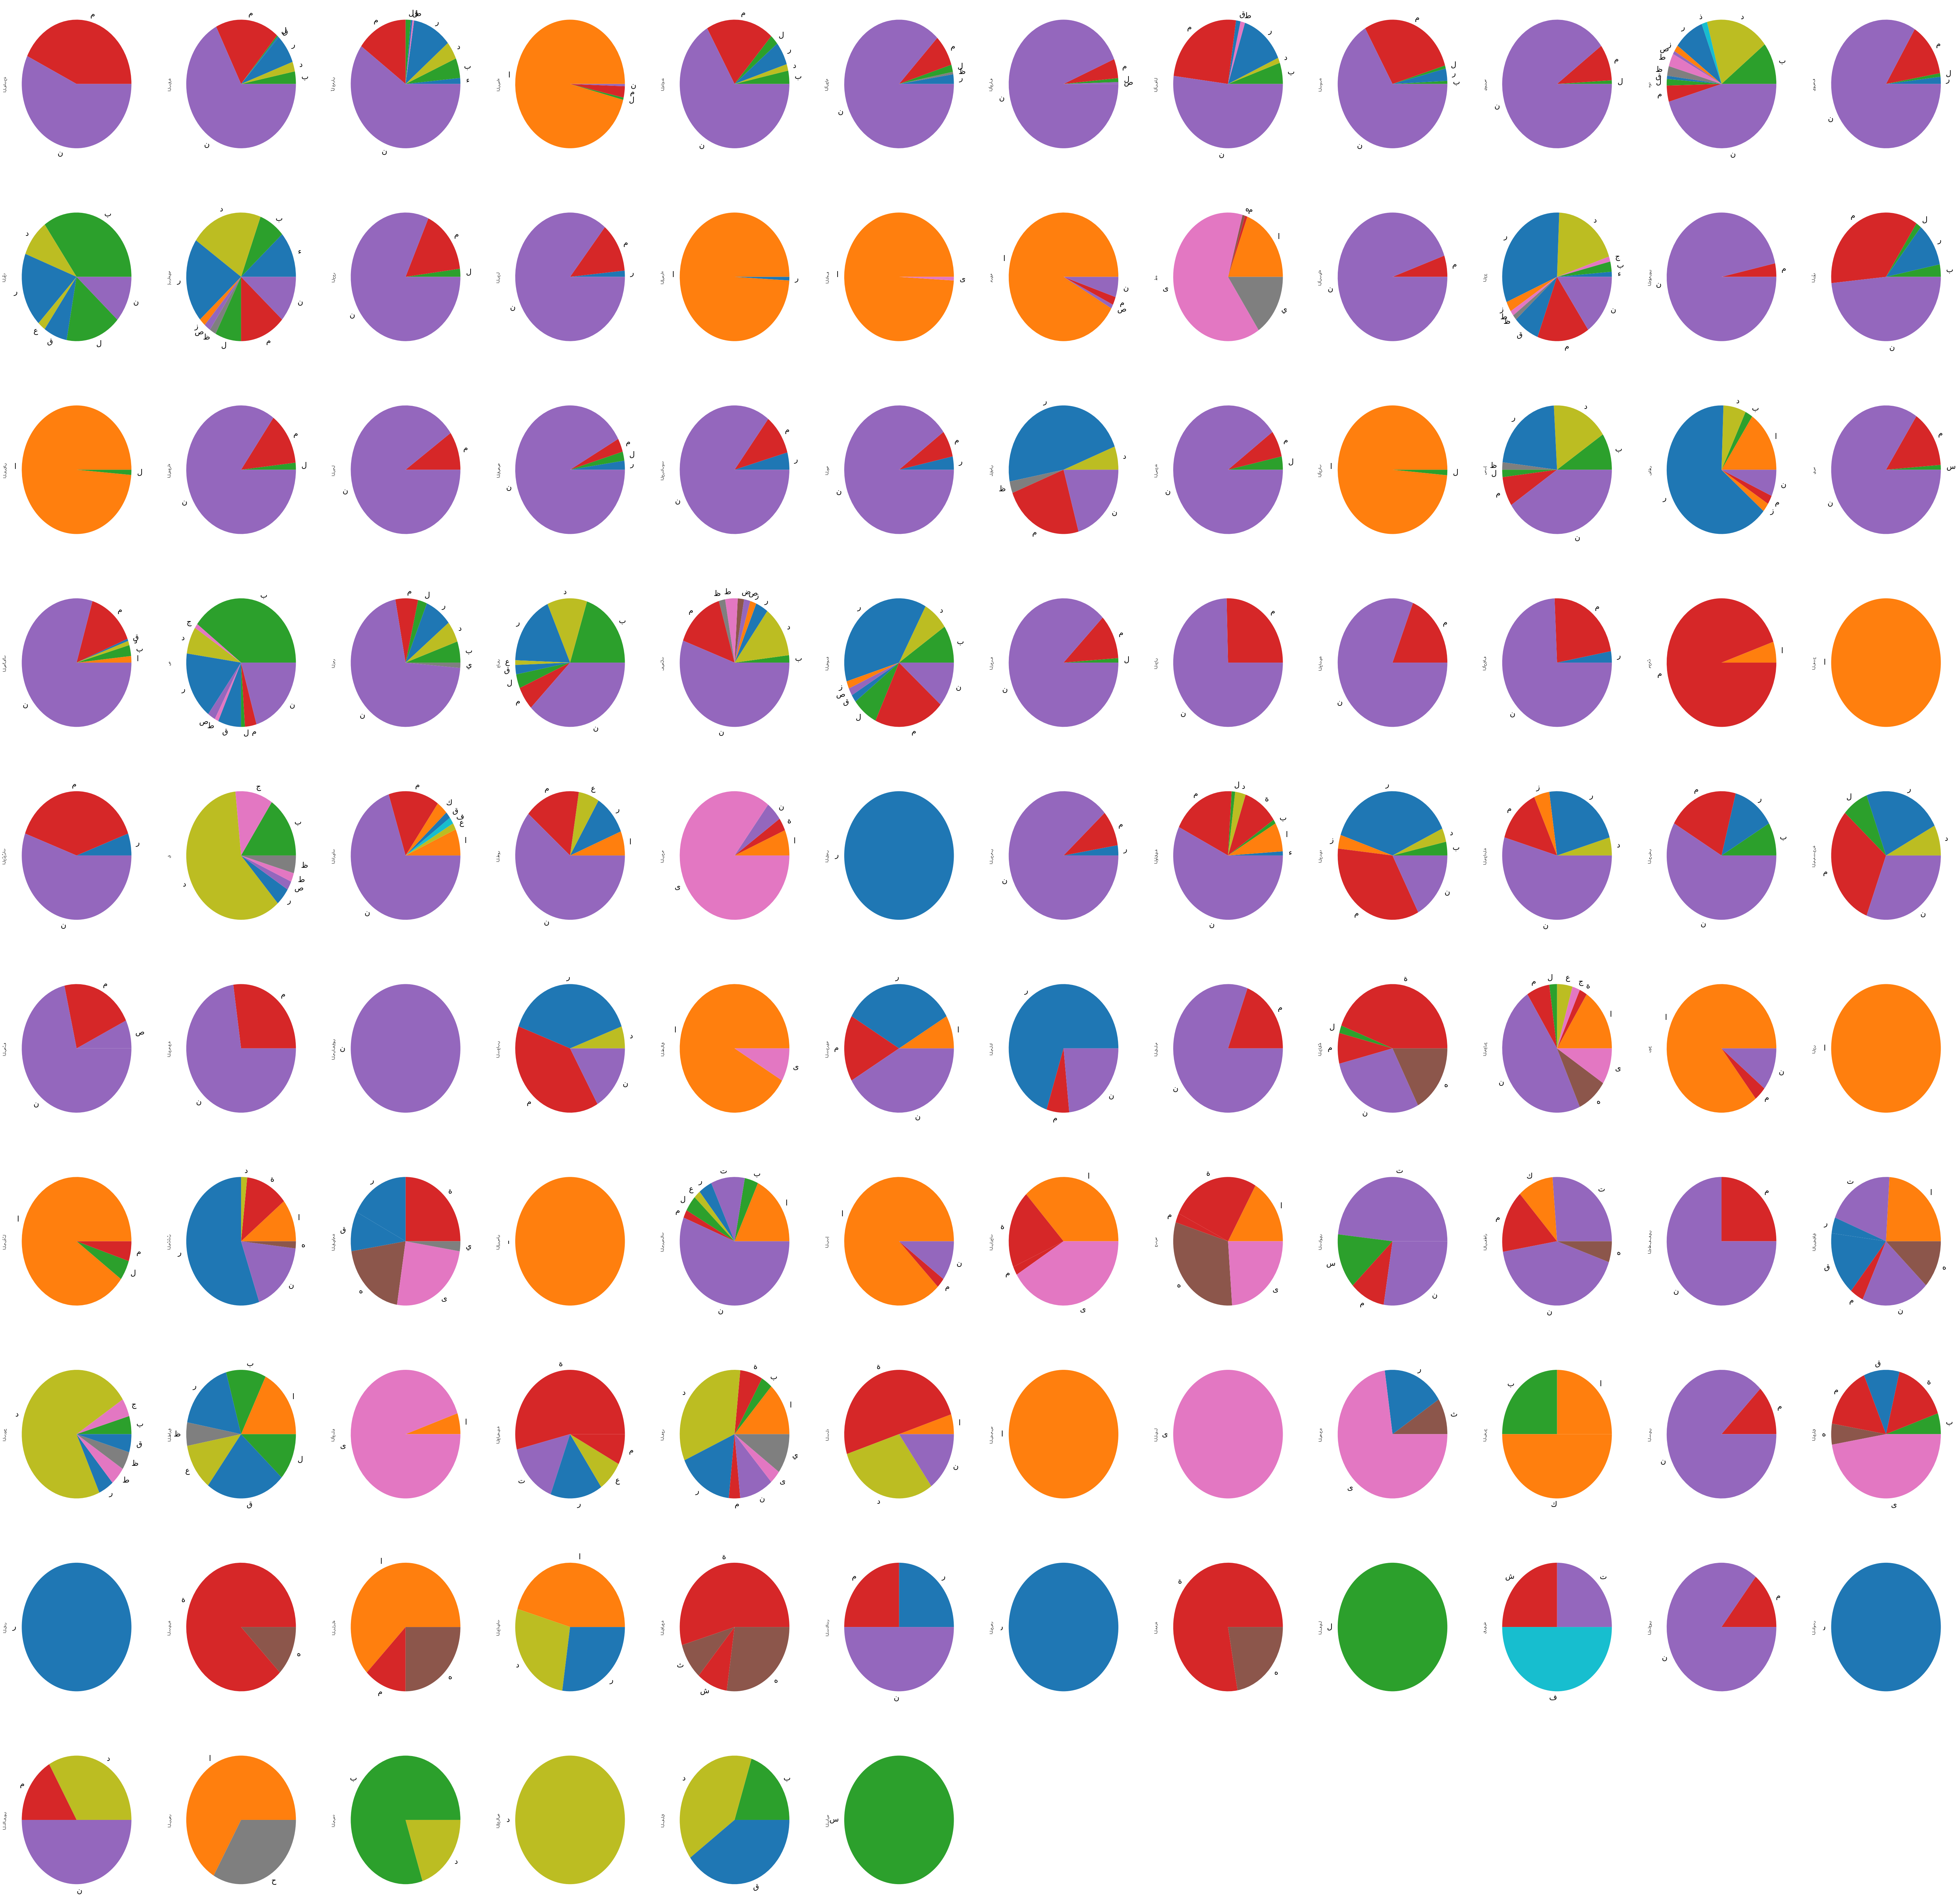

In [10]:
import csv
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt


def read_csv(input_path):
    l = []
    with open(input_path) as fb:
        fbreader = csv.reader(fb , delimiter='|', quoting=csv.QUOTE_NONE)
        x = 0
        for row in fbreader:
            l.append(row)
    
    return l
def filterDiac(row):
    f = ''
    for e in row:
        if(unicodedata.category(e) == 'Lo' or unicodedata.category(e) == 'Zs' ):
            f += e
    return f.strip()
def read_sora_names(input_path):
    df = pd.read_csv(input_path, delimiter='|', index_col=None)
    return df
def read_panda(input_path, sora_names_path):
    df = pd.read_csv(input_path, header=None, delimiter='|', names=["sorah", "aya", "txt"], index_col=None)
    df['indx'] = df.index.tolist()
    df['txt-diac'] = df['txt'].apply(filterDiac)
    df['txt-last'] = df['txt-diac'].apply(lambda x : x[len(x)-1])
    df = df.set_index('sorah')
    sorat = df.groupby('sorah')
    last_aya = {}
    aya_per_sora = {}
    for name, group in sorat:
        for s in group['txt-last']:
            if(s not in last_aya):
                last_aya[s] = 1
            else:
                last_aya[s] = last_aya[s] + 1
        aya_per_sora[name] = last_aya
        last_aya = {}
    ldf = pd.DataFrame.from_dict(aya_per_sora, orient='index')
    ldf = ldf.reset_index()
    s_names = read_sora_names(sora_names_path)
    ldf.sort_index(axis=1, inplace=True)
    ldf = ldf.fillna(0)
    ldf = ldf.astype('int32')
    ldf['s_names'] = s_names['name']
    ldf = ldf.set_index('s_names')
    ldf = ldf.drop('index', axis=1)
    return ldf
#read_panda('./Arabic-Original.csv', './sora_names.csv')
def plot_details():
    ldf = read_panda('./Arabic-Original.csv', './sora_names.csv')
    fig = plt.gcf()
    fig.set_size_inches(500, 500, forward=True)
    for i in range(0, len(ldf.index)):
        fig.add_subplot(10,12,i+1)
        #plt.subplot(6,5,i+1)
        plot = ldf.iloc[i].plot.pie(subplots=False, fontsize=22, figsize=(100, 100))    
    fig.savefig('details.png', dpi=100)
    
def plot_summary():
    ldf = read_panda('./Arabic-Original.csv', './sora_names.csv')
    spd = ldf.sum(axis=0)
    fig = plt.figure(figsize=(6,6), dpi=200)
    ax = plt.subplot(111)
    #fig.set_size_inches(500, 500, forward=True)
    #fig.add_subplot(1,1,1)
    spd.plot.pie(ax=ax, autopct='%1.1f%%',fontsize=22, figsize=(50, 50))
    plt.legend( loc = 'right')
    fig.savefig('summary.png', dpi=100)
plot_details()